<a href="https://colab.research.google.com/github/akrampathan07/Time-Series-Forecasting/blob/main/NonSeasonalData_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv('TCS.NSE.csv')

# Display the first few rows of the dataset to inspect the data
df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0
5,2015-01-08,1221.199951,1224.500000,1210.275024,1221.900024,1070.343994,1565408.0
6,2015-01-09,1227.500000,1259.949951,1225.000000,1256.150024,1100.346191,3197642.0
7,2015-01-12,1258.500000,1264.000000,1240.125000,1254.849976,1099.207397,1596006.0
8,2015-01-13,1260.000000,1265.199951,1240.050049,1248.949951,1094.039185,1468432.0
9,2015-01-14,1258.000000,1265.900024,1250.250000,1260.974976,1104.572876,1787096.0


In [ ]:
# Drop rows with missing values (if any)
df = df.dropna()

# Drop duplicate rows (if any)
df = df.drop_duplicates()

# Convert date column to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


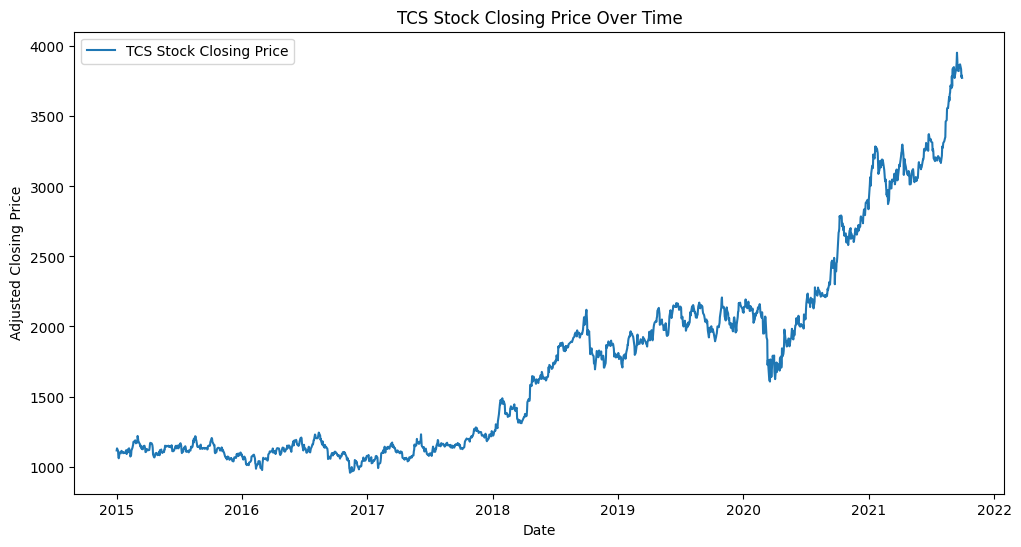

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plotting the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='TCS Stock Closing Price')
plt.title('TCS Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

## Augmented Dickey–Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
result_original = adfuller(df['Adj Close'])
print('ADF Statistic (Original):', result_original[0])
print('p-value (Original):', result_original[1])
print('Critical Values (Original):', result_original[4])

ADF Statistic (Original): 1.3331281540631172
p-value (Original): 0.9967881317689532
Critical Values (Original): {'1%': -3.4343026006557427, '5%': -2.863285847799246, '10%': -2.5676994479374455}


We can see that P- value is greater than 0.05. so this is not Stationary so we need to make it stationary by differencing.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np


<Figure size 1200x600 with 0 Axes>

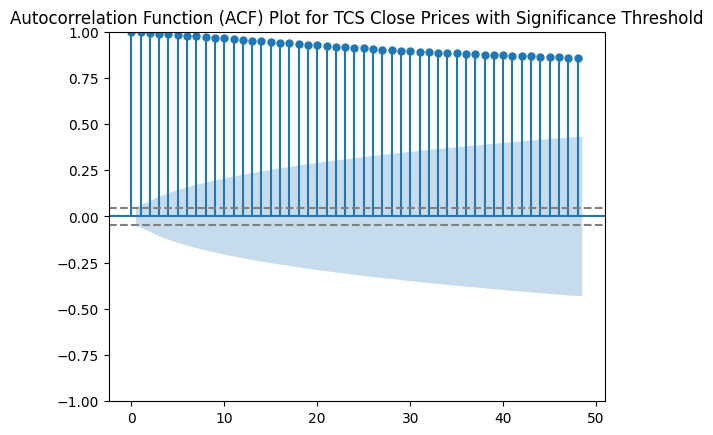

In [ ]:
# Plot ACF for 'Adj Close'
plt.figure(figsize=(12, 6))
acf_plot_close = plot_acf(df['Adj Close'].dropna(), lags=48, alpha=0.05)  # alpha sets confidence interval (default is 95%)

# Add a dotted line at the significance threshold
plt.axhline(y=-1.96/np.sqrt(len(df['Adj Close'])), linestyle='--', color='gray')  # Adjust for desired confidence level
plt.axhline(y=1.96/np.sqrt(len(df['Adj Close'])), linestyle='--', color='gray')   # Adjust for desired confidence level

plt.title('Autocorrelation Function (ACF) Plot for TCS Close Prices with Significance Threshold')
plt.show()

In [ ]:
#Differenced Once
df['Adj Close'] = df['Adj Close'].diff()

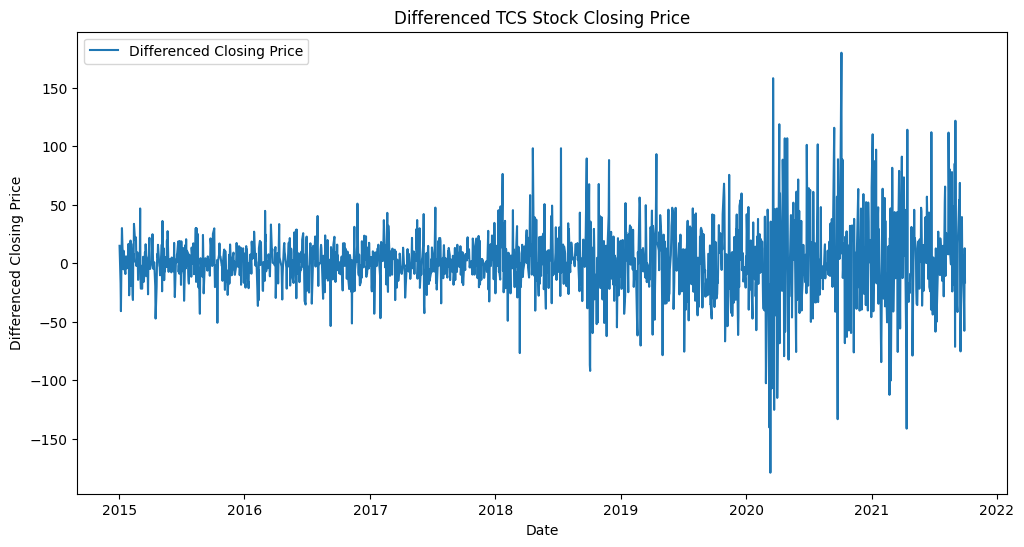

In [ ]:
# Plotting differenced closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Differenced Closing Price')
plt.title('Differenced TCS Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Price')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

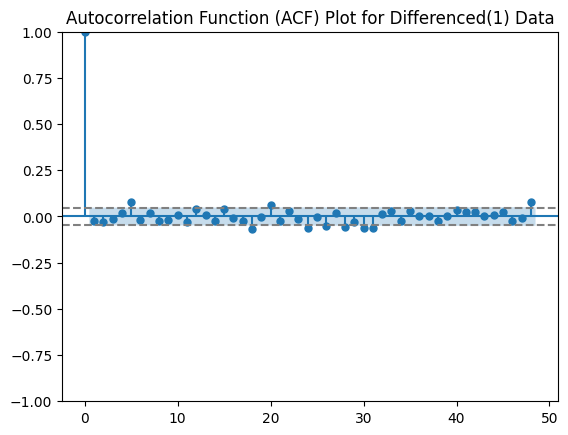

In [ ]:
# Plot ACF for 'Adj Close'
plt.figure(figsize=(12, 6))
acf_plot_close = plot_acf(df['Adj Close'].dropna(), lags=48, alpha=0.05)  # alpha sets confidence interval (default is 95%)

# Add a dotted line at the significance threshold
plt.axhline(y=-1.96/np.sqrt(len(df['Adj Close'])), linestyle='--', color='gray')  # Adjust for desired confidence level
plt.axhline(y=1.96/np.sqrt(len(df['Adj Close'])), linestyle='--', color='gray')   # Adjust for desired confidence level

plt.title('Autocorrelation Function (ACF) Plot for Differenced(1) Data')
plt.show()

from ACF plot we can say that significant lag is 5 here

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,NaN,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,14.847900,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,-17.169433,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,-41.016968,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,-12.657959,2636332.0


After Differencing we got some NaN value in our column so we are filling it.

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and df['Adj Close'] is the differenced column
df['Adj Close'].fillna(method='bfill', inplace=True)


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,14.847900,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,14.847900,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,-17.169433,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,-41.016968,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,-12.657959,2636332.0


In [ ]:
pip install pmdarima


In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(df['Adj Close'], test='adf')


0

This 0 shows that after once Diffenrecing we dont need to difference again.

###P is the order of Autoregressive (AR). From PACF plot we can find the value of P.
###q is the order of Moving Average (MA). From ACF plot we can find the value of q

# PACF PLOT

<Figure size 1200x600 with 0 Axes>

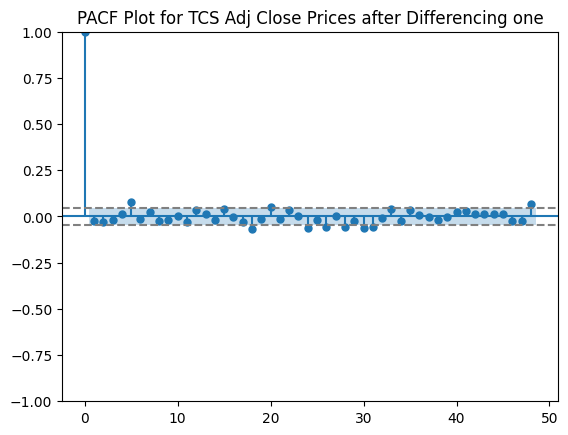

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
# Plot PACF for 'Adj Close' with significance lines
plt.figure(figsize=(12, 6))
pacf_plot_close = plot_pacf(df['Adj Close'].dropna(), lags=48, alpha=0.05)  # Adjust 'lags' and alpha as needed

# Add a dotted line at the significance threshold
plt.axhline(y=-1.96/np.sqrt(len(df['Adj Close'])), linestyle='--', color='gray')  # Adjust for desired confidence level
plt.axhline(y=1.96/np.sqrt(len(df['Adj Close'])), linestyle='--', color='gray')   # Adjust for desired confidence level

plt.title('PACF Plot for TCS Adj Close Prices after Differencing one')
plt.show()

From PACF plot we can say that lag 5 is significant

In [ ]:
#There is another method to calculate p,d,q values
import itertools
p= range(0,8)
q= range(0,8)
d= range(0,2)

pdq_combination= list(itertools.product(p,d,q))
len(pdq_combination)
rmse= []
order1= []

In [ ]:
for pdq in pdq_combination:
  try:
    model= ARIMA(train, order=pdq).fit()
    pred= model.predict(start=len(train), end=(len(df2)-1))
    error= np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)
  except:
    continue

In [ ]:
results= pd.DataFrame(index=order1, data= rmse, columns= ['RMSE'])

In [ ]:
print(results)

Empty DataFrame
Columns: [RMSE]
Index: []


In [ ]:
# Assuming 'results' is your DataFrame
min_rmse_order = results['RMSE'].idxmin()
min_rmse_value = results.loc[[min_rmse_order]]

print(f"The order with the least RMSE is: {min_rmse_order}")
print(f"RMSE value: {min_rmse_value['RMSE'].values[0]}")


TypeError: ignored

## Fitting the ARIMA Model

In [ ]:
pip install --upgrade statsmodels


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(df['Adj Close'], order=(5, 1, 5))
result = model.fit()

# Print the summary
print(result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1663
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -7937.906
Date:                Thu, 14 Dec 2023   AIC                          15897.811
Time:                        01:00:56   BIC                          15957.385
Sample:                             0   HQIC                         15919.890
                               - 1663                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6358      0.228     -2.786      0.005      -1.083      -0.189
ar.L2         -0.1467      0.310     -0.474      0.636      -0.754       0.460
ar.L3         -0.0542      0.233     -0.232      0.8

(array([1.63578540e-05, 4.90735621e-05, 2.29009957e-04, 1.19412334e-03,
        9.12768255e-03, 1.41168280e-02, 1.93022678e-03, 4.41662059e-04,
        6.54314162e-05, 3.27157081e-05]),
 array([-188.35989039, -151.59938936, -114.83888832,  -78.07838728,
         -41.31788624,   -4.55738521,   32.20311583,   68.96361687,
         105.7241179 ,  142.48461894,  179.24511998]),
 <BarContainer object of 10 artists>)

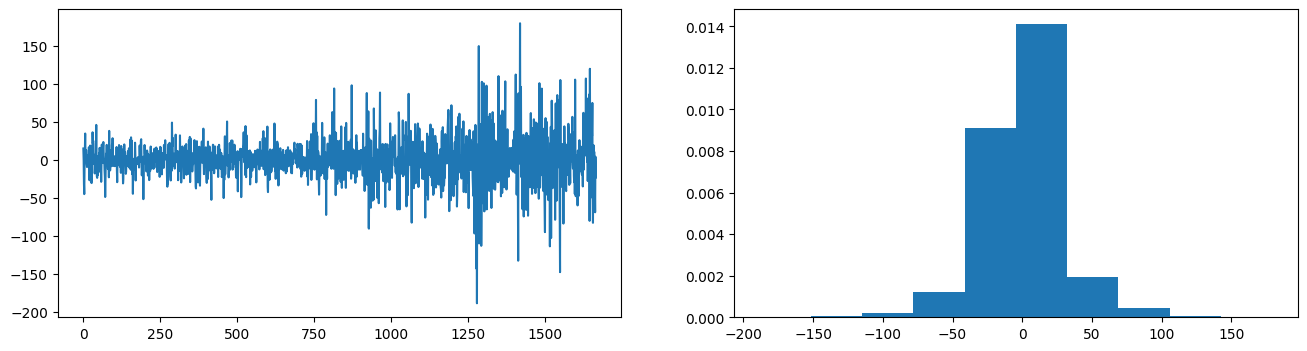

In [ ]:
#Plot Residual Errors
residuals= pd.DataFrame(result.resid)

fig, (ax1, ax2)= plt.subplots(1,2, figsize= (16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density= True)

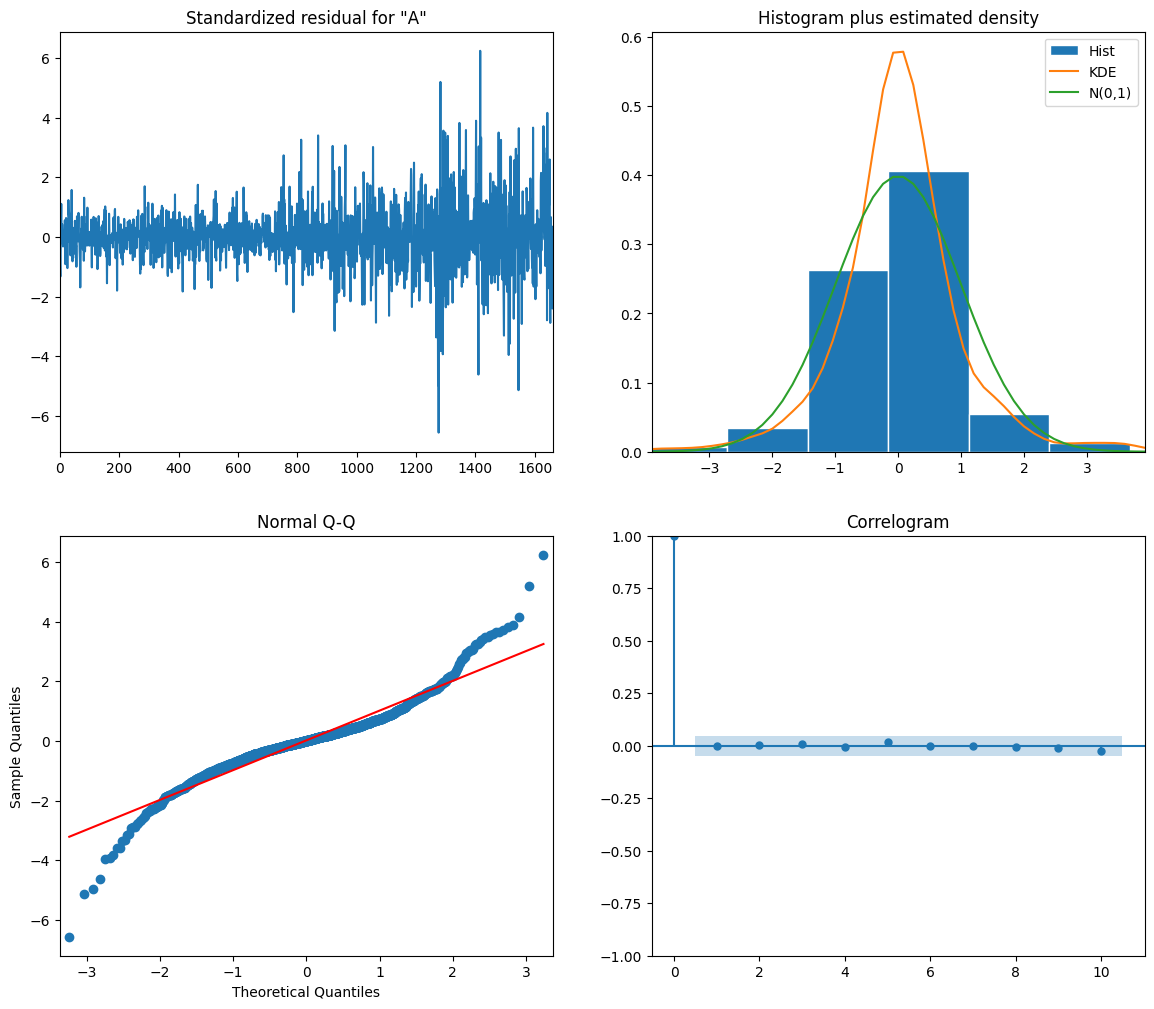

In [ ]:
result.plot_diagnostics(figsize=(14,12))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

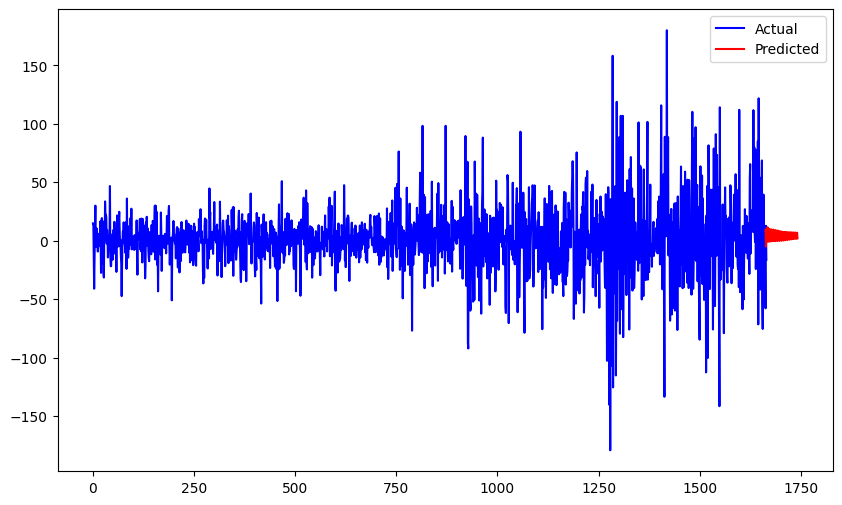

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1663
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -7937.906
Date:                Thu, 14 Dec 2023   AIC                          15897.811
Time:                        01:01:46   BIC                          15957.385
Sample:                             0   HQIC                         15919.890
                               - 1663                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6358      0.228     -2.786      0.005      -1.083      -0.189
ar.L2         -0.1467      0.310     -0.474      0.636      -0.754       0.460
ar.L3         -0.0542      0.233     -0.232      0.8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(df['Adj Close'], order=(5, 1, 5))

# Fit the model
result = model.fit()

# Get forecast
forecast = result.forecast(steps=80)

# Plot Actual vs Predicted
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Adj Close'], label='Actual', color='blue')
ax.plot(range(len(df), len(df) + len(forecast)), forecast, label='Predicted', color='red')
ax.legend()

plt.show()

# Print the summary
print(result.summary())



In [ ]:
from IPython.core.debugger import set_trace

import os
import time

plt.style.use(style= 'seaborn')
%matplotlib inline

<ipython-input-28-24e7b4a938f4>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style= 'seaborn')


In [ ]:
df2= df[['Adj Close']].copy()

In [ ]:
df2.describe()

,Adj Close
count,1663.000000
mean,1.608833
std,28.905735
min,-179.190307
25%,-11.156067
50%,0.845825
75%,14.064392
max,179.956055


## Train and Test

In [ ]:
#implementing on differenced(1), Stationary time series
from sklearn.metrics import mean_squared_error

n = int(len(df2) * 0.8)
train = df2['Adj Close'][:n]
test = df2['Adj Close'][n:]


In [ ]:
print(len(train))
print(len(test))

1330
333


In [ ]:
import warnings
warnings.filterwarnings("ignore")

model = ARIMA(train, order= (5,1,5))
result= model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1330
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -6133.457
Date:                Thu, 14 Dec 2023   AIC                          12288.914
Time:                        01:02:29   BIC                          12346.028
Sample:                             0   HQIC                         12310.320
                               - 1330                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8600      0.070    -12.267      0.000      -0.997      -0.723
ar.L2         -0.7726      0.103     -7.480      0.000      -0.975      -0.570
ar.L3         -0.7550      0.098     -7.693      0.000      -0.947      -0.563
ar.L4         -0.8667      0.061    -14.256      0.000      -0.986      -0.748
ar.L5          0.0410      0.023      1.772      0.076      -0.004       0.086
ma.L1         -0.1401      0.068     -2.051      0.040      -0.274      -0.006
ma.L2         -0.0701      0.064     -1.099      0.272      -0.195       0.055
ma.L3         -0.0607      0.064     -0.952      0.341      -0.186       0.064
ma.L4          0.1289      0.066      1.947      0.052      -0.001       0.259
ma.L5         -0.8552      0.065    -13.093      0.000      -0.983      -0.727
sigma2       596.4798     13.507     44.162      0.000     570.007     622.952
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1935.46
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.41   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

# Forecast using the trained model
forecast_result = result.forecast(steps=len(test))

# Evaluate the Model
mse = mean_squared_error(test, forecast_result)
rmse = mse**0.5

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 1745.0090962294664
Root Mean Squared Error: 41.773306024654865


In [ ]:
# For cheking the model is good or not
test.mean(), np.sqrt(test.var())

(5.302418753753754, 41.09671817912104)

Mean Squared Error: 1745.0090962294664
Root Mean Squared Error: 41.773306024654865


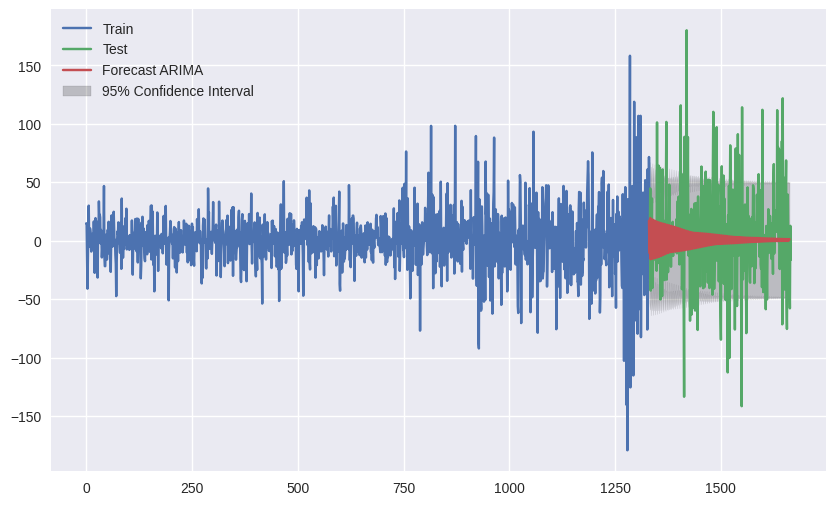

In [ ]:
# Forecast using the trained model
forecast_result = result.get_forecast(steps=len(test))
forecast_mean = forecast_result.predicted_mean
confidence_interval = forecast_result.conf_int()

# Evaluate the Model
mse = mean_squared_error(test, forecast_mean)
rmse = mse**0.5

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting
train.plot(legend=True, label='Train', figsize=(10, 6))
test.plot(legend=True, label='Test')
forecast_mean.plot(legend=True, label='Forecast ARIMA')

# Plot confidence interval
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='k', alpha=0.2, label='95% Confidence Interval')

plt.legend()
plt.show()


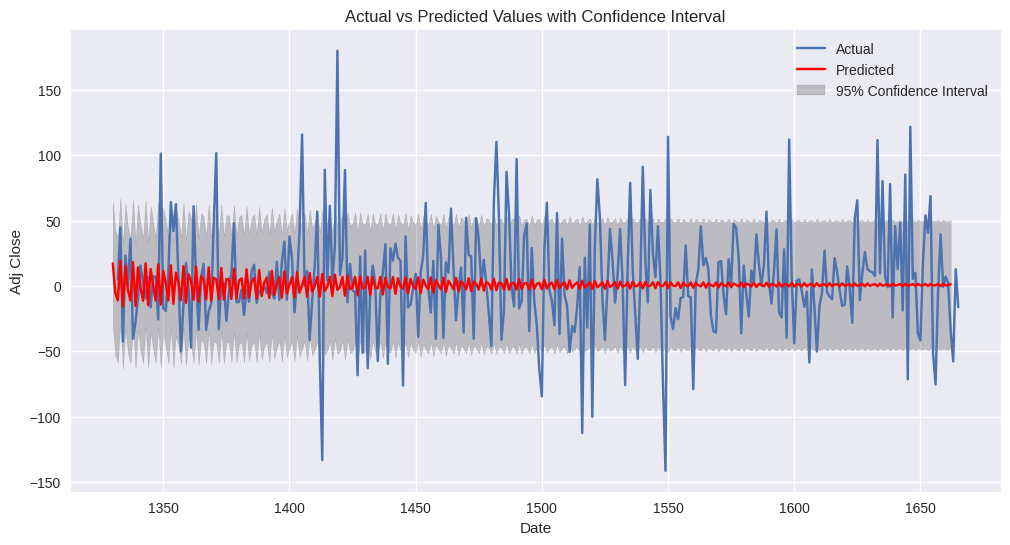

In [ ]:
import matplotlib.pyplot as plt

# Forecast using the trained model
forecast_result = result.get_forecast(steps=len(test))
forecast_mean = forecast_result.predicted_mean
confidence_interval = forecast_result.conf_int()

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Predicted')
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='k', alpha=0.2, label='95% Confidence Interval')
plt.title('Actual vs Predicted Values with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()


# Predict Future Data

In [ ]:
final_model= ARIMA(df2, order=(5,1,5)).fit()      # Build on Full Dataset

In [ ]:
predication= final_model.predict(len(df2),len(df2)+60)  #predicting for next 60 trading days

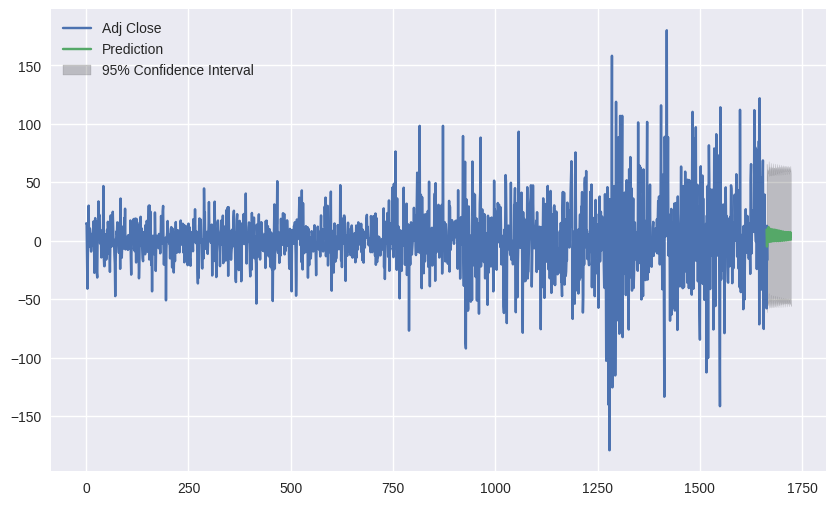

In [ ]:
# Make predictions for the next 60 trading days
forecast_result = final_model.get_forecast(steps=60)
forecast_mean = forecast_result.predicted_mean
confidence_interval = forecast_result.conf_int()

# Plotting
df2.plot(legend=True, label='Train', figsize=(10, 6))
forecast_mean.plot(legend=True, label='Prediction')

# Plot confidence interval
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='k', alpha=0.2, label='95% Confidence Interval')

plt.legend()
plt.show()


# Applying ARMA + GARCH model

In [ ]:
pip install arch


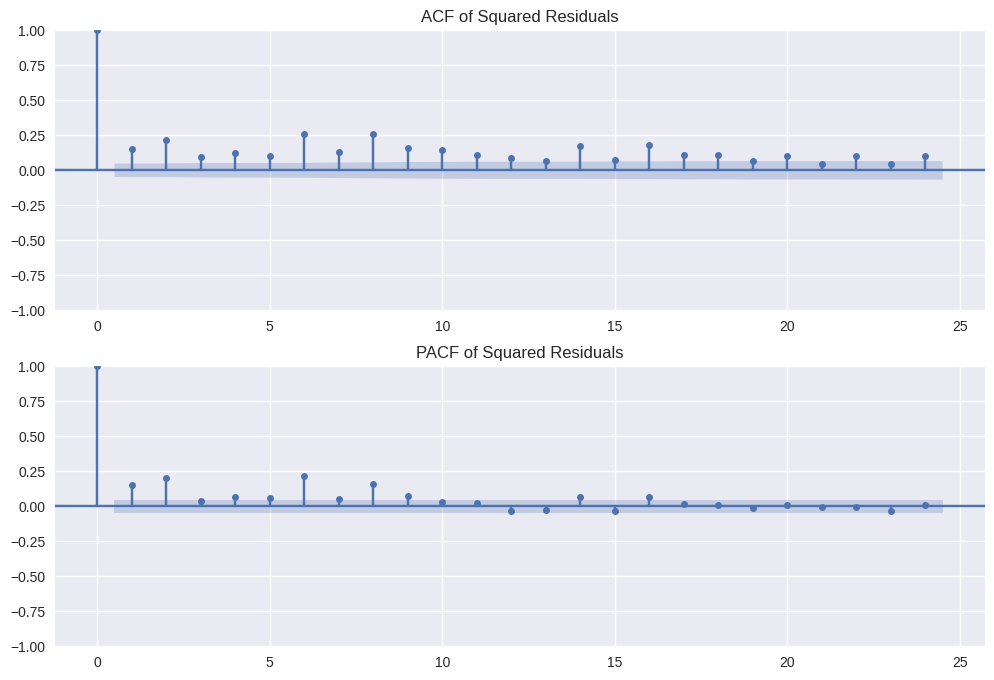

In [ ]:
# Calculate residuals
residuals = final_model.resid

# Square the residuals
squared_residuals = residuals ** 2

# Plot ACF and PACF of squared residuals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(squared_residuals, ax=ax1, lags=24)
ax1.set_title('ACF of Squared Residuals')

# PACF plot
plot_pacf(squared_residuals, ax=ax2, lags=24)
ax2.set_title('PACF of Squared Residuals')

plt.show()

From ACF we can see that there are 12 significant lags and PACF shows 2 significant lags. so values of p,q are 2,12 respectively

In [ ]:
import arch

# Fit GARCH model
garch_model = arch.arch_model(squared_residuals, vol='Garch', p=2, q=12)
garch_result = garch_model.fit()

# Display the model summary
print(garch_result.summary())


Iteration:      1,   Func. Count:     18,   Neg. LLF: 15479.85549846365
Iteration:      2,   Func. Count:     36,   Neg. LLF: 14801.743908800738
Iteration:      3,   Func. Count:     54,   Neg. LLF: 14484.198800656342
Iteration:      4,   Func. Count:     72,   Neg. LLF: 14491.362085353292
Iteration:      5,   Func. Count:     90,   Neg. LLF: 15899.734746079577
Iteration:      6,   Func. Count:    108,   Neg. LLF: 14512.792297746002
Iteration:      7,   Func. Count:    126,   Neg. LLF: 14486.193636467751
Iteration:      8,   Func. Count:    144,   Neg. LLF: 14445.290992972263
Iteration:      9,   Func. Count:    162,   Neg. LLF: 14393.441076504987
Iteration:     10,   Func. Count:    179,   Neg. LLF: 14384.922876378334
Iteration:     11,   Func. Count:    196,   Neg. LLF: 14791.883511480872
Iteration:     12,   Func. Count:    214,   Neg. LLF: 14433.753553312763
Iteration:     13,   Func. Count:    232,   Neg. LLF: 14436.748019897936
Iteration:     14,   Func. Count:    250,   Neg. LLF

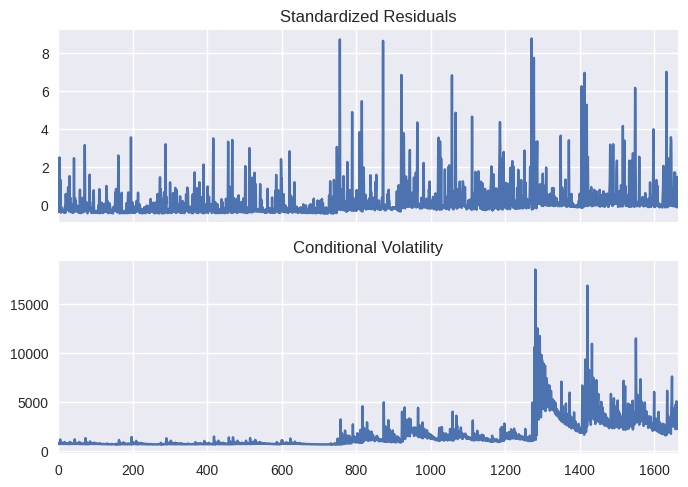

In [ ]:
# Plot results and diagnostics
garch_result.plot()
plt.show()
